#Задание: Проанализируйте ряды и сделайте их стационарными

In [172]:
import pandas as pd
import matplotlib.pyplot as plt

In [173]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

##Отображение графиков

In [174]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

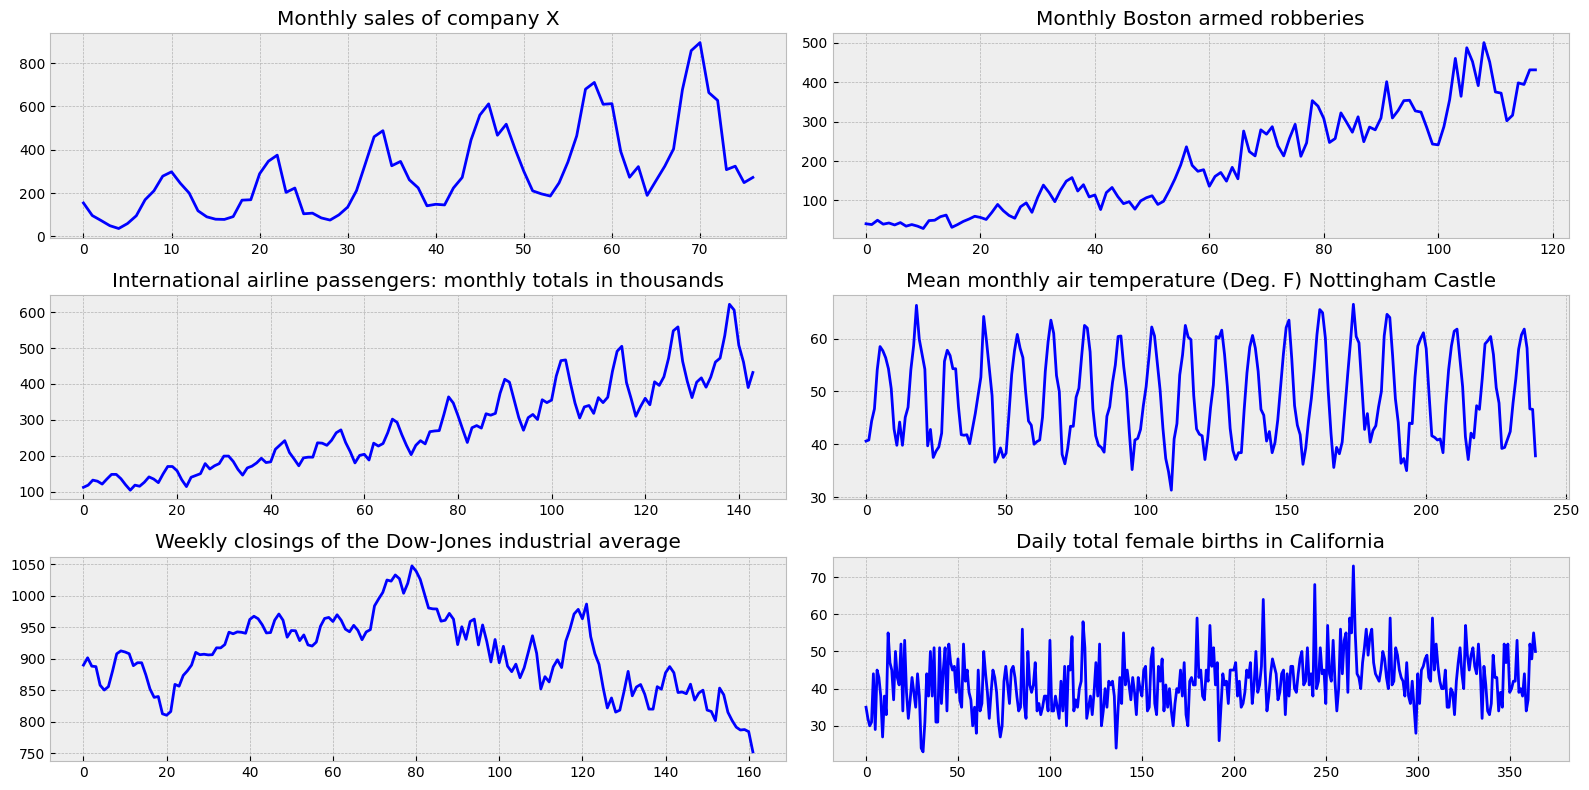

In [175]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

##Проверим являются ли графики стационарными, для этого применим статистический тест Дики-Фуллера

Дополненный тест Дики-Фуллера это тип статистического теста называется единичный корень тест.

Интуиция за единичным корневым тестом заключается в том, что он определяет, насколько сильно временной ряд определяется трендом.

Существует целый ряд тестов единичного корня, и Augmented Dickey-Fuller может быть одним из наиболее широко используемых. Он использует авторегрессионную модель и оптимизирует информационный критерий для множества различных значений запаздывания.

Нулевая гипотеза теста состоит в том, что временной ряд может быть представлен единичным корнем, что он не является стационарным (имеет некоторую зависящую от времени структуру). Альтернативная гипотеза (отвергающая нулевую гипотезу) состоит в том, что временной ряд является стационарным.

* **Нулевая гипотеза (H0)**: Если не удалось отклонить, он предполагает, что временной ряд имеет единичный корень, то есть он нестационарный. Он имеет некоторую временную структуру.
* **Альтернативная гипотеза (H1)**: Нулевая гипотеза отвергается; он предполагает, что временной ряд не имеет единичного корня, то есть он является стационарным. Он не имеет временной структуры.

Мы интерпретируем этот результат, используя значение p из теста. Значение p ниже порогового значения (в данном случае 5%) предполагает, что мы отвергаем нулевую гипотезу (стационарную), в противном случае значение p выше порогового значения указывает на то, что мы не можем отклонить нулевую гипотезу (нестационарную).

р-значение > 0.05: Не удается отклонить нулевую гипотезу (H0), данные имеют единичный корень и являются нестационарными.

р-значение <= 0.05 Отклонить нулевую гипотезу (H0), данные не имеют единичного корня и являются стационарными.

In [176]:
from statsmodels.tsa.stattools import adfuller

In [177]:
def Dickey_Fuller(X):
  """"Функция принимает на вход временной ряд
  и выводит на печать значения теста Дики-Фуллера 
  """
  result = adfuller(X)
  print('ADF Statistic: %f' % result[0])
  print('p-value: %f' % result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    print()
  if result[1] > 0.05:
    print('Временной ряд не является стационарным')
  else:
    print('Стационарный временной ряд')     

In [178]:
for key, value in all_series.items():
  print("_______________\n")
  print(f'Временной ряд {key}')
  print()
  Dickey_Fuller(value)

_______________

Временной ряд Monthly sales of company X

ADF Statistic: 0.654715
p-value: 0.988889
Critical Values:
	1%: -3.537

	5%: -2.908

	10%: -2.591

Временной ряд не является стационарным
_______________

Временной ряд Monthly Boston armed robberies

ADF Statistic: 1.001102
p-value: 0.994278
Critical Values:
	1%: -3.494

	5%: -2.889

	10%: -2.582

Временной ряд не является стационарным
_______________

Временной ряд International airline passengers: monthly totals in thousands

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482

	5%: -2.884

	10%: -2.579

Временной ряд не является стационарным
_______________

Временной ряд Mean monthly air temperature (Deg. F) Nottingham Castle

ADF Statistic: -3.255492
p-value: 0.016989
Critical Values:
	1%: -3.460

	5%: -2.874

	10%: -2.574

Стационарный временной ряд
_______________

Временной ряд Weekly closings of the Dow-Jones industrial average

ADF Statistic: -1.314625
p-value: 0.622455
Critical Values:
	1%: -3.472

**По результатам работы теста:**

Стационарными временными рядами являются:
* Mean monthly air temperature (Deg. F) Nottingham Castle
* Daily total female births in California

Нестационарные временные ряды:
* Monthly sales of company X
* Monthly Boston armed robberies
* International airline passengers: monthly totals in thousands
* Weekly closings of the Dow-Jones industrial average

## Графики автокорреляции

На графике автокорреляции стационарного ряда ожидается, что значения автокорреляции будут близки к нулю на всех лагах, поскольку стационарный ряд не имеет систематических зависимостей между наблюдениями на разных временных отступах.

В случае графика автокорреляции нестационарного ряда, мы можем ожидать наличие автокорреляции на некоторых лагах. Это свидетельствует о наличии систематических зависимостей между значениями ряда на разных временных отступах.

In [179]:
from statsmodels.graphics.tsaplots import plot_acf

Количество лагов возьмем равное 12, так как предполагаем, что сезонность на всех графиках равна 12 месяцам

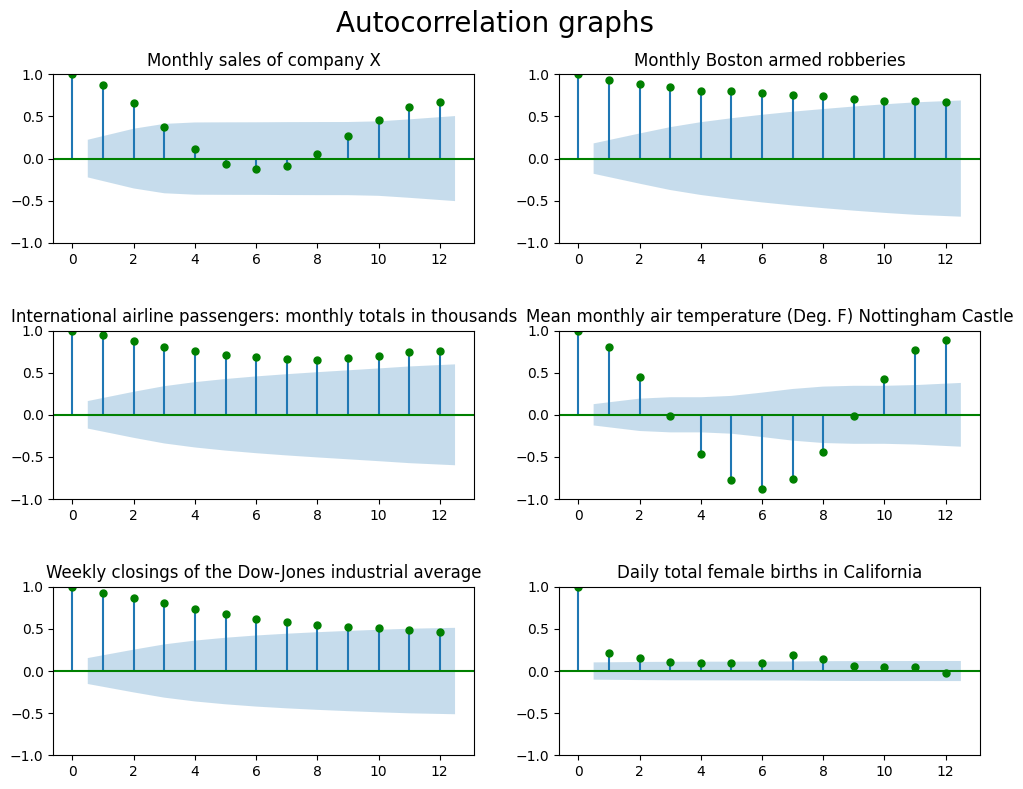

In [180]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8))
fig.suptitle('Autocorrelation graphs', fontsize=20)
row, col = 0, 0

for key, value in all_series.items():
    ax = axes[row, col]
    plot_acf(value, lags= 12, ax=ax, color='g')
    ax.set_title(key)
    
    col += 1
    if col == 2:
        col = 0
        row += 1

plt.tight_layout(w_pad= 3, h_pad= 3)
plt.show()

Графики автокорреляции не отвергают гипотезу о нестационарности ряда, кроме графика "Daily total female births in California". 

## Преобразование временных рядов в стационарный ряд

Для преобразования нестационарного временного ряда в стационарный можно применить различные методы. 

Несколько распространенных методов:

* Дифференцирование (Differencing): Вы можете вычесть предыдущее наблюдение из текущего наблюдения. Это позволяет удалить тренд из ряда. Если тренд все еще присутствует, можно повторить разностное преобразование на нескольких лагах. Например, для удаления сезонности, вы можете применить сезонное разностное преобразование, вычитая значение на одном сезонном лаге.

* Логарифмическое преобразование (Log Transformation): Возможно, применение логарифмического преобразования поможет уменьшить вариативность величин и сделать ряд более стабильным. Особенно это может быть полезно, если величины имеют экспоненциальный рост или вариативность увеличивается с ростом значений.

* Сглаживание (Smoothing): Применение методов сглаживания, таких как скользящее среднее или экспоненциальное сглаживание, может помочь удалить случайную составляющую и сделать ряд более стационарным.

* Удаление сезонности (Seasonal Adjustment): Если ряд имеет ярко выраженную сезонность, можно применить методы сезонной корректировки, такие как множители сезонности или декомпозиция временных рядов, чтобы удалить сезонный компонент.


Так как временные ряды "Daily total female births in California" и "Mean monthly air temperature (Deg. F) Nottingham Castle" подтвердили свою стационарность в статистическом тесте, то их не будем преобразовывать, так для проверки стационарности, после преобразования, мы будем использовать тот же тест

In [284]:
def grafs(series):
   """Функция возвращает графики временных рядов """
   with plt.style.context('bmh'):
    plt.figure(figsize=(14, 6), dpi= 120)
    layout = (2, 2)
    for i, key in enumerate(series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [283]:
def Autocorrelation_graphs(series):
    """Функция возвращает графики автокорреляции временных рядов"""
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6), dpi= 120)
    fig.suptitle('Autocorrelation graphs', fontsize=20)
    row, col = 0, 0

    for key, value in series.items():
        ax = axes[row, col]
        plot_acf(value, lags= 12, ax=ax, color='g')
        ax.set_title(key)
        
        col += 1
        if col == 2:
            col = 0
            row += 1

    plt.tight_layout(w_pad= 3, h_pad= 3)
    plt.show()

In [227]:
series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
}

###Дифференцирование (Differencing)

In [184]:
diff_siries = {}

In [185]:
for key, value in series.items():
  diff_siries[key] = value.diff().dropna()

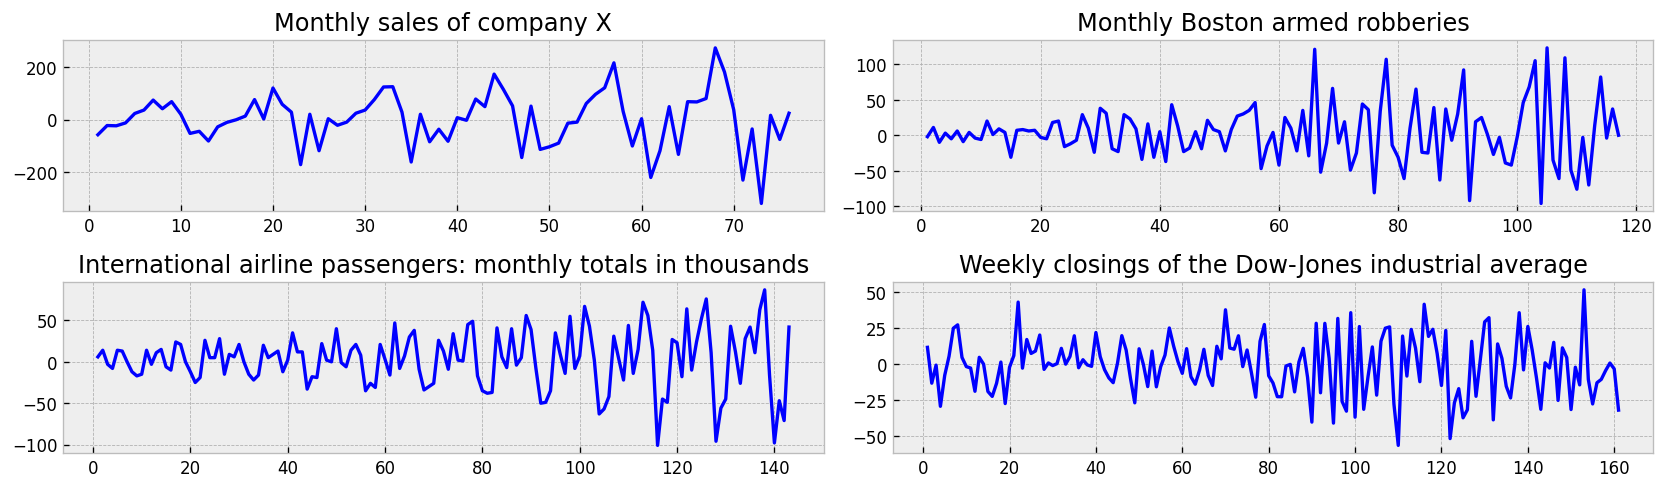

In [186]:
grafs(diff_siries)

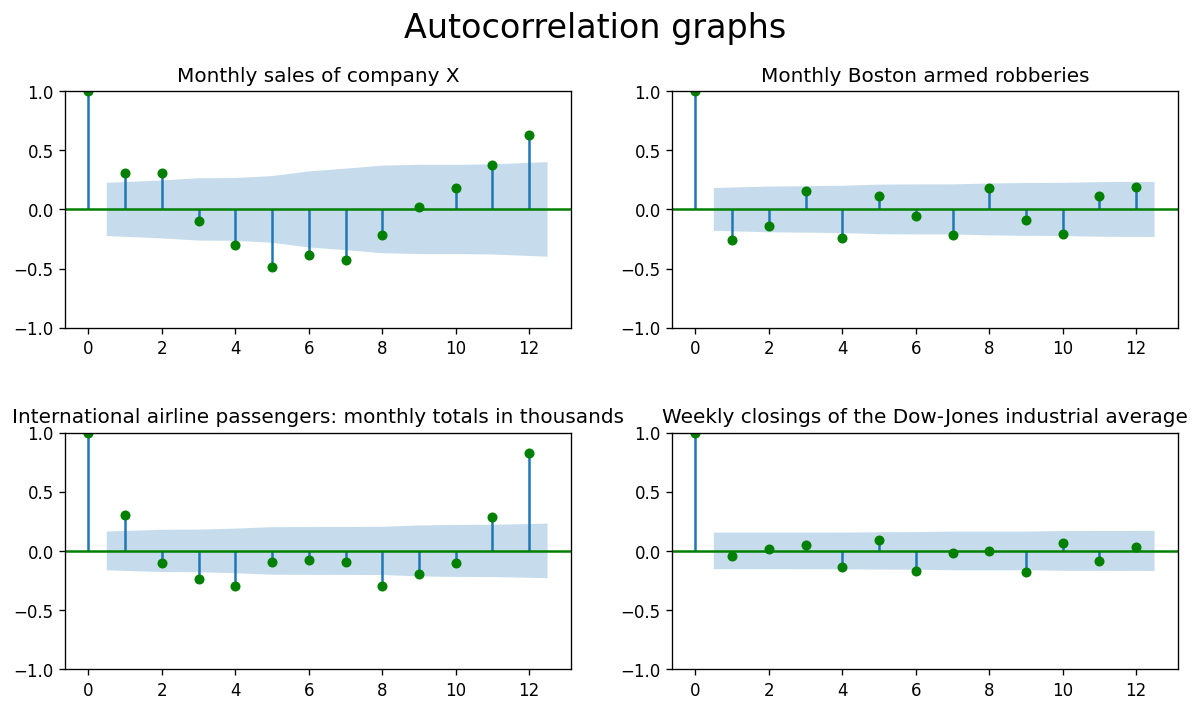

In [187]:
Autocorrelation_graphs(diff_siries)

In [188]:
for key, value in diff_siries.items():
  print("_______________\n")
  print(f'Временной ряд {key}')
  print()
  Dickey_Fuller(value)

_______________

Временной ряд Monthly sales of company X

ADF Statistic: -2.587970
p-value: 0.095509
Critical Values:
	1%: -3.539

	5%: -2.909

	10%: -2.592

Временной ряд не является стационарным
_______________

Временной ряд Monthly Boston armed robberies

ADF Statistic: -7.428564
p-value: 0.000000
Critical Values:
	1%: -3.494

	5%: -2.889

	10%: -2.582

Стационарный временной ряд
_______________

Временной ряд International airline passengers: monthly totals in thousands

ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482

	5%: -2.884

	10%: -2.579

Временной ряд не является стационарным
_______________

Временной ряд Weekly closings of the Dow-Jones industrial average

ADF Statistic: -13.025208
p-value: 0.000000
Critical Values:
	1%: -3.472

	5%: -2.880

	10%: -2.576

Стационарный временной ряд


С помощью дифферинцирования временные ряды "Monthly Boston armed robberies" и "Weekly closings of the Dow-Jones industrial average" удалось привести к стационарному виду

###Логарифмическое преобразование (Log Transformation)

In [189]:
import numpy as np

In [190]:
log_series = {}

In [191]:
for key, value in series.items():
  log_series[key] = np.log(value)

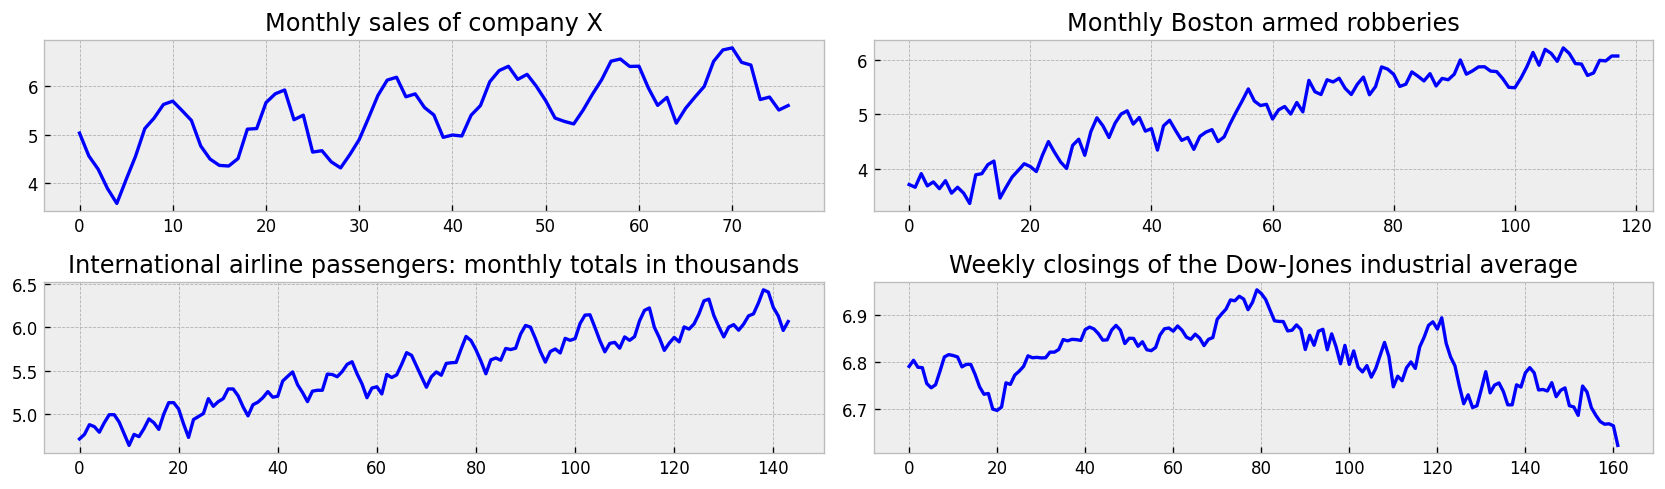

In [192]:
grafs(log_series)

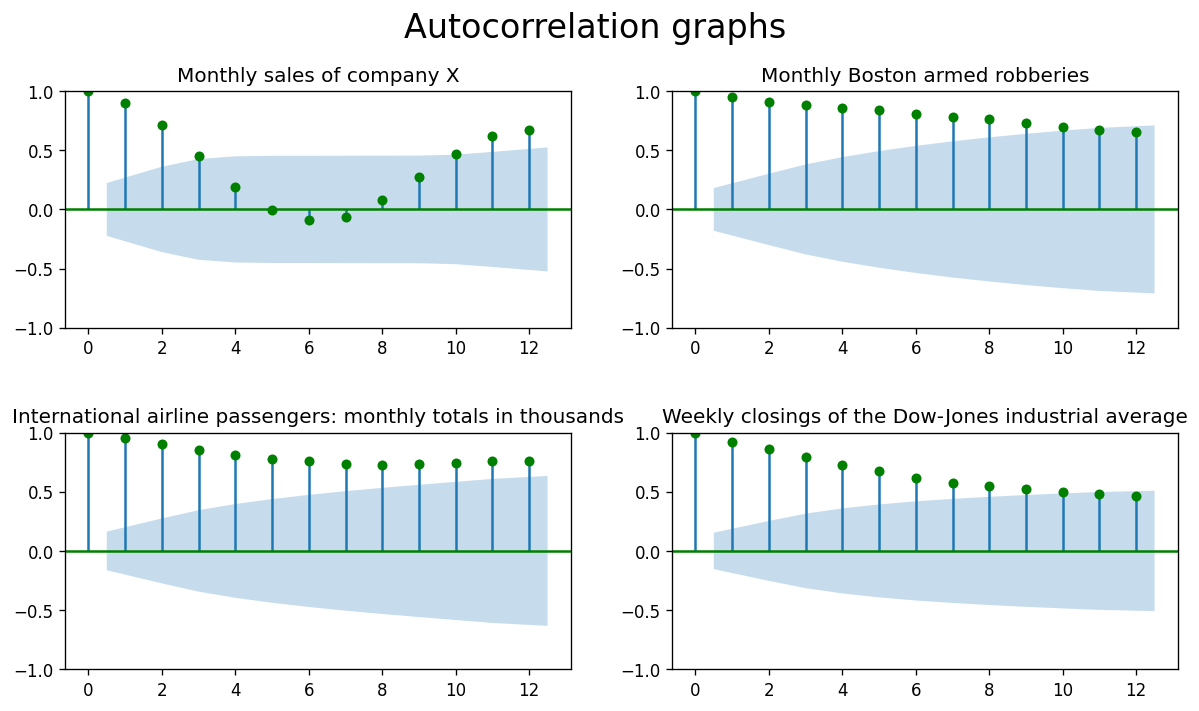

In [193]:
Autocorrelation_graphs(log_series)

In [194]:
for key, value in log_series.items():
  print("_______________\n")
  print(f'Временной ряд {key}')
  print()
  Dickey_Fuller(value)

_______________

Временной ряд Monthly sales of company X

ADF Statistic: -0.908049
p-value: 0.785310
Critical Values:
	1%: -3.537

	5%: -2.908

	10%: -2.591

Временной ряд не является стационарным
_______________

Временной ряд Monthly Boston armed robberies

ADF Statistic: -2.013161
p-value: 0.280833
Critical Values:
	1%: -3.493

	5%: -2.889

	10%: -2.581

Временной ряд не является стационарным
_______________

Временной ряд International airline passengers: monthly totals in thousands

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482

	5%: -2.884

	10%: -2.579

Временной ряд не является стационарным
_______________

Временной ряд Weekly closings of the Dow-Jones industrial average

ADF Statistic: -1.210369
p-value: 0.669119
Critical Values:
	1%: -3.472

	5%: -2.880

	10%: -2.576

Временной ряд не является стационарным


Логарифмическое преобразование не привело к стационарному виду временные ряды 

###Сглаживание (Smoothing)

**Экспоненциальное сглаживание (Exponential Smoothing)**

In [195]:
smoothed_series = {}

In [196]:
for key, value in series.items():
  smoothed_series[key] = value.ewm(alpha=0.5).mean()

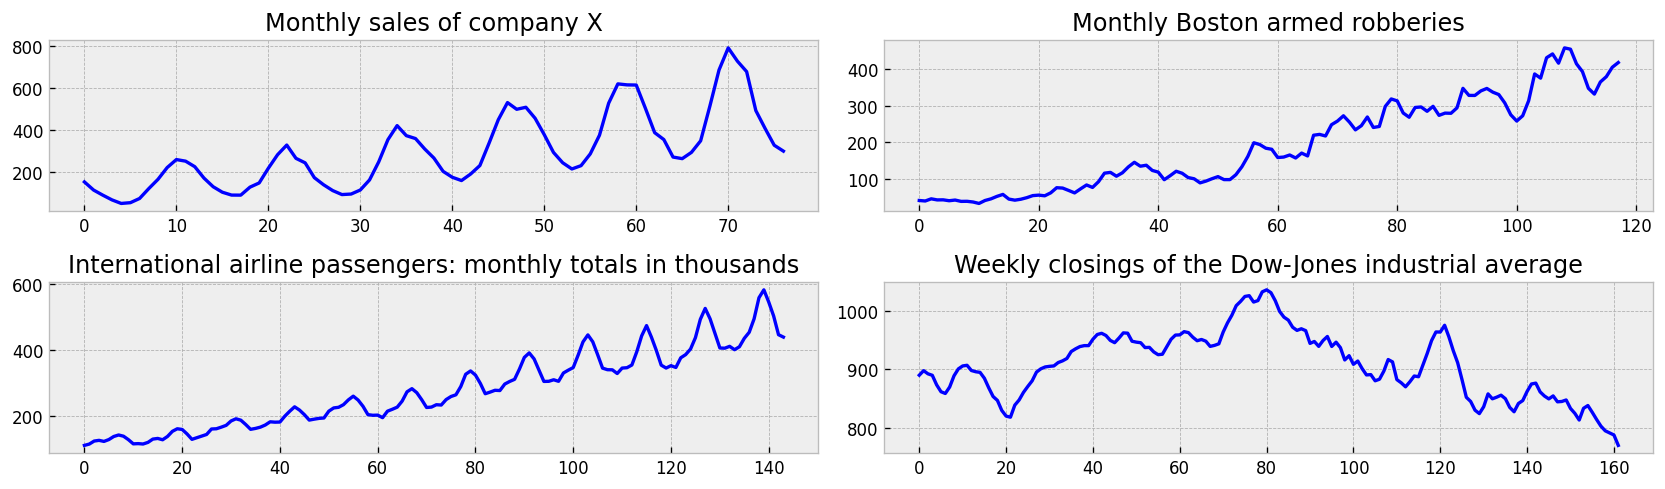

In [197]:
grafs(smoothed_series)

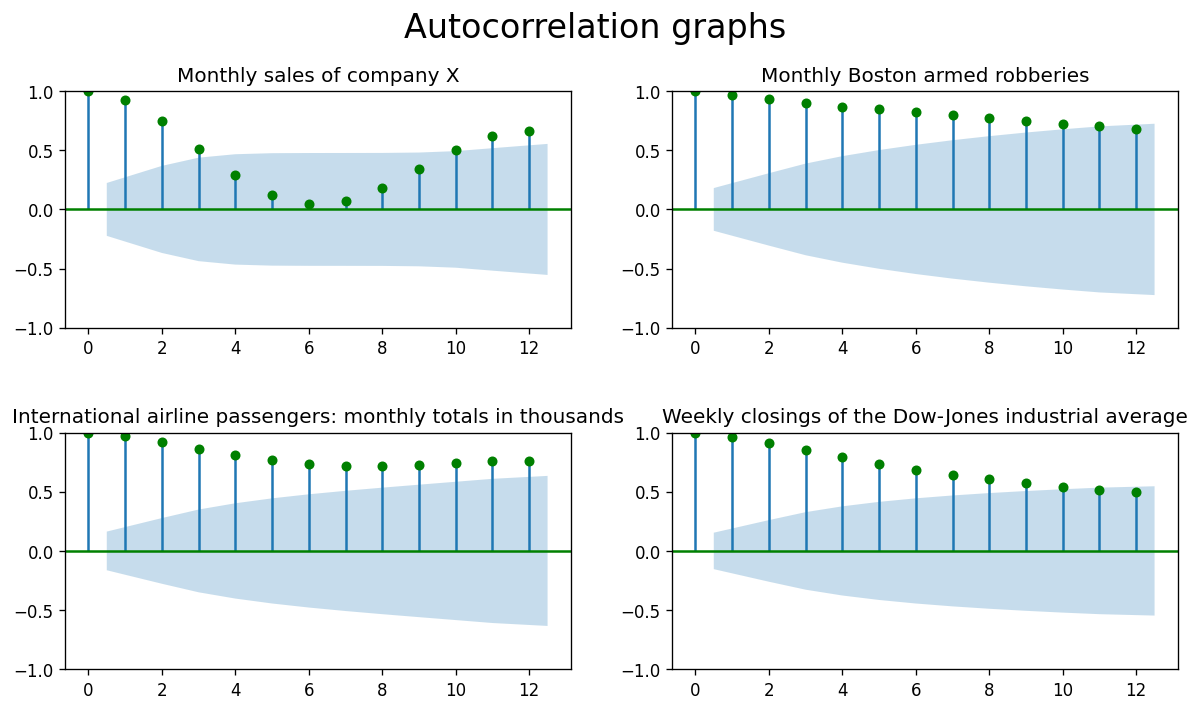

In [198]:
Autocorrelation_graphs(smoothed_series)

In [199]:
for key, value in smoothed_series.items():
  print("_______________\n")
  print(f'Временной ряд {key}')
  print()
  Dickey_Fuller(value)

_______________

Временной ряд Monthly sales of company X

ADF Statistic: 0.253520
p-value: 0.975109
Critical Values:
	1%: -3.537

	5%: -2.908

	10%: -2.591

Временной ряд не является стационарным
_______________

Временной ряд Monthly Boston armed robberies

ADF Statistic: 0.503395
p-value: 0.984976
Critical Values:
	1%: -3.494

	5%: -2.889

	10%: -2.582

Временной ряд не является стационарным
_______________

Временной ряд International airline passengers: monthly totals in thousands

ADF Statistic: 0.886721
p-value: 0.992915
Critical Values:
	1%: -3.482

	5%: -2.884

	10%: -2.579

Временной ряд не является стационарным
_______________

Временной ряд Weekly closings of the Dow-Jones industrial average

ADF Statistic: -1.214481
p-value: 0.667335
Critical Values:
	1%: -3.472

	5%: -2.880

	10%: -2.576

Временной ряд не является стационарным


Экспоненциальное сглаживание не привело к стационарному виду временные ряды 

### Применяем другие методы

**Уберем изменение дисперсии при помощи преобразования Бокса-Кокса**

Преобразование Бокса-Кокса — это широко используемый метод преобразования ненормально распределенного набора данных в более нормально распределенный .

Основная идея этого метода состоит в том, чтобы найти некоторое значение λ, чтобы преобразованные данные были как можно ближе к нормальному распределению, используя следующую формулу:

* $y(λ) = (y λ – 1) / λ$,  если y ≠ 0
* $y(λ) = log(y)$,   если y = 0


In [259]:
from scipy.stats import boxcox

In [263]:
boxcox_series = {}

In [264]:
for key, value in series.items():
  boxcox_series[key]= pd.Series(boxcox(value,0))

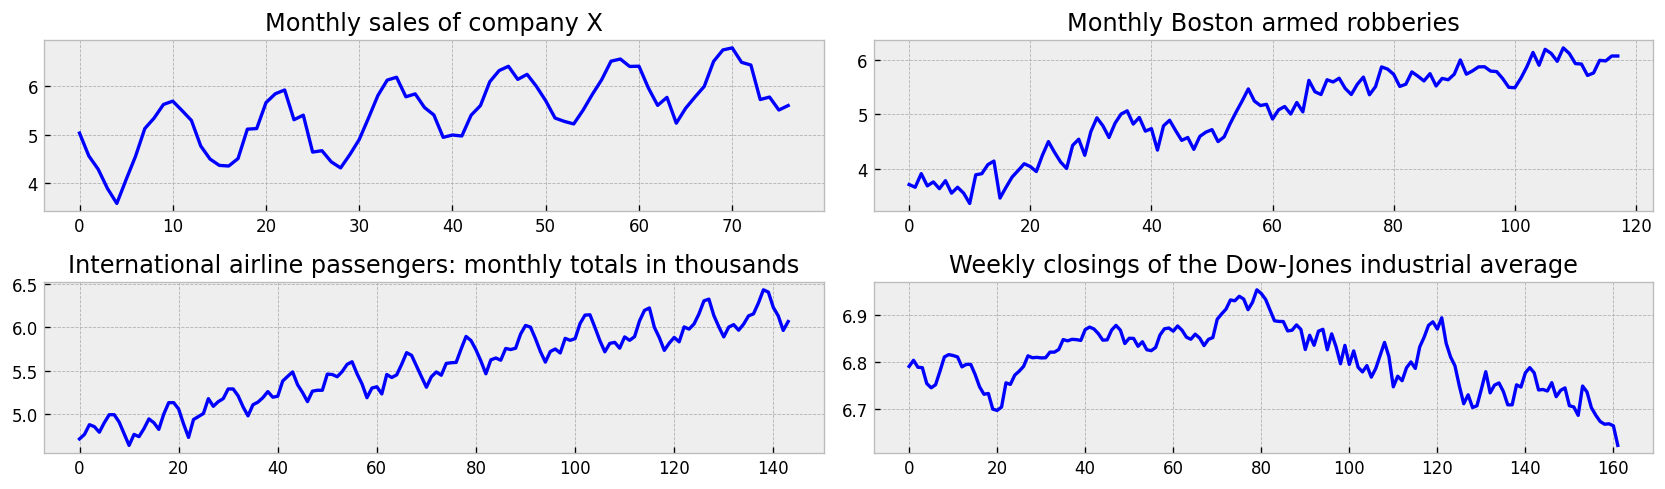

In [265]:
grafs(boxcox_series)

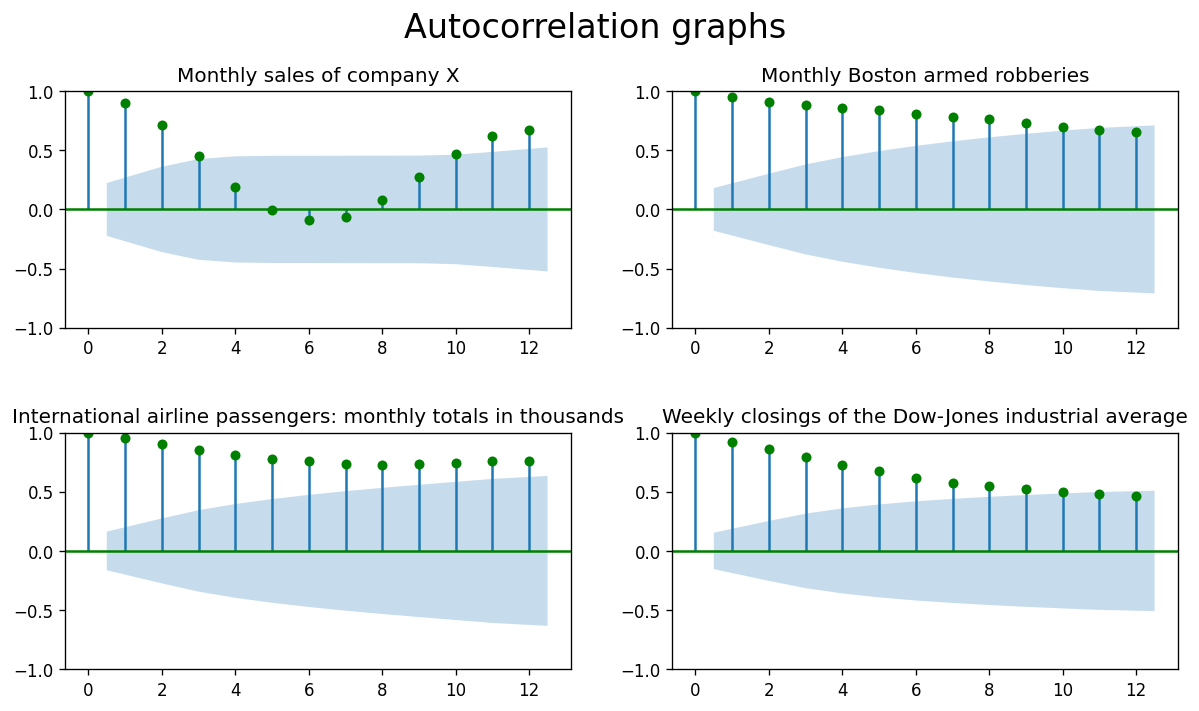

In [266]:
Autocorrelation_graphs(boxcox_series)

In [267]:
for key, value in boxcox_series.items():
  print("_______________\n")
  print(f'Временной ряд {key}')
  print()
  Dickey_Fuller(value)

_______________

Временной ряд Monthly sales of company X

ADF Statistic: -0.908049
p-value: 0.785310
Critical Values:
	1%: -3.537

	5%: -2.908

	10%: -2.591

Временной ряд не является стационарным
_______________

Временной ряд Monthly Boston armed robberies

ADF Statistic: -2.013161
p-value: 0.280833
Critical Values:
	1%: -3.493

	5%: -2.889

	10%: -2.581

Временной ряд не является стационарным
_______________

Временной ряд International airline passengers: monthly totals in thousands

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482

	5%: -2.884

	10%: -2.579

Временной ряд не является стационарным
_______________

Временной ряд Weekly closings of the Dow-Jones industrial average

ADF Statistic: -1.210369
p-value: 0.669119
Critical Values:
	1%: -3.472

	5%: -2.880

	10%: -2.576

Временной ряд не является стационарным


Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда.

**Уберем тренд дифференцированием.**

In [310]:
trend_series = {}

In [311]:
for key, value in boxcox_series.items():
  trend_series[key] = value.diff().dropna()

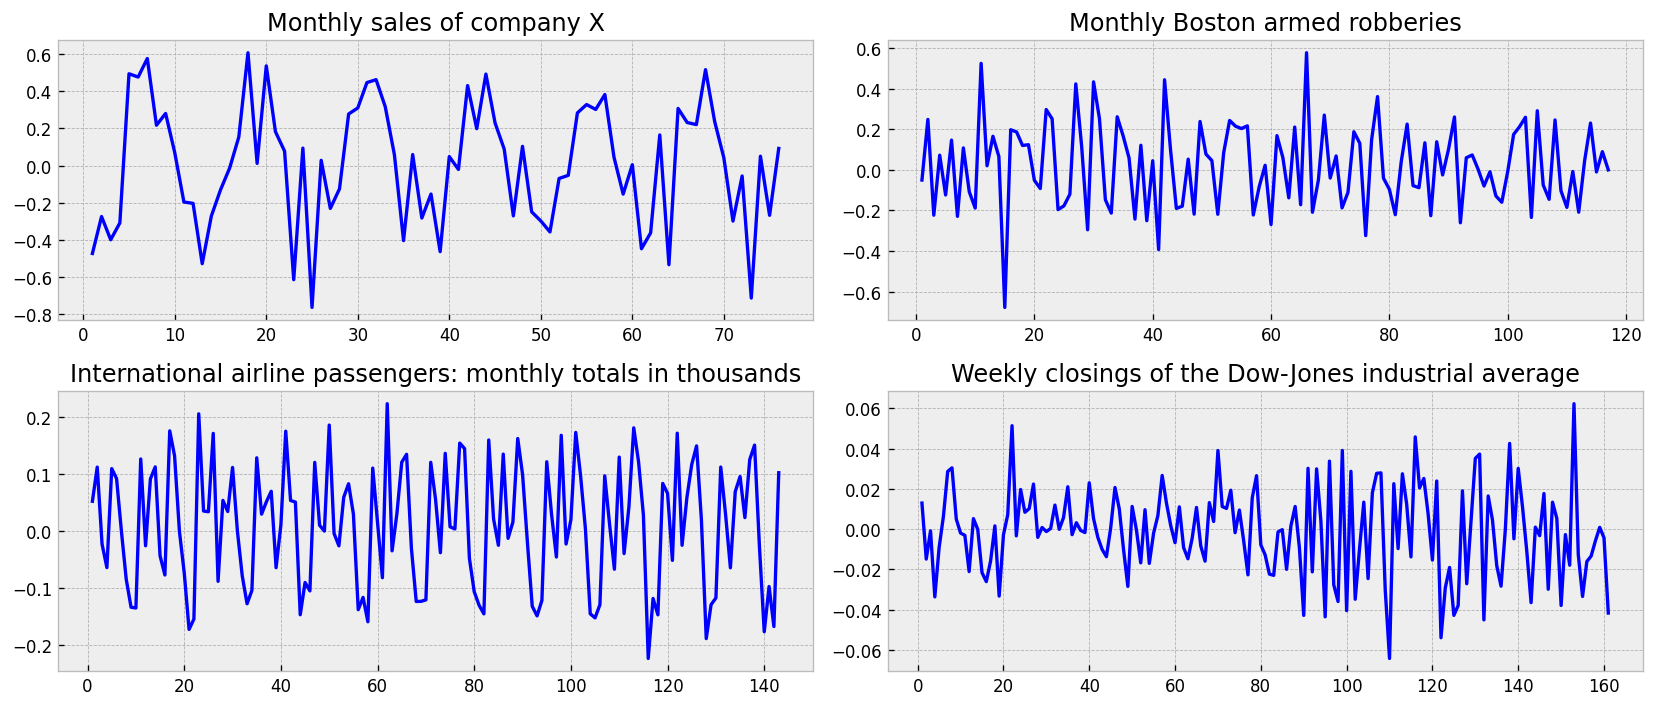

In [312]:
grafs(trend_series)

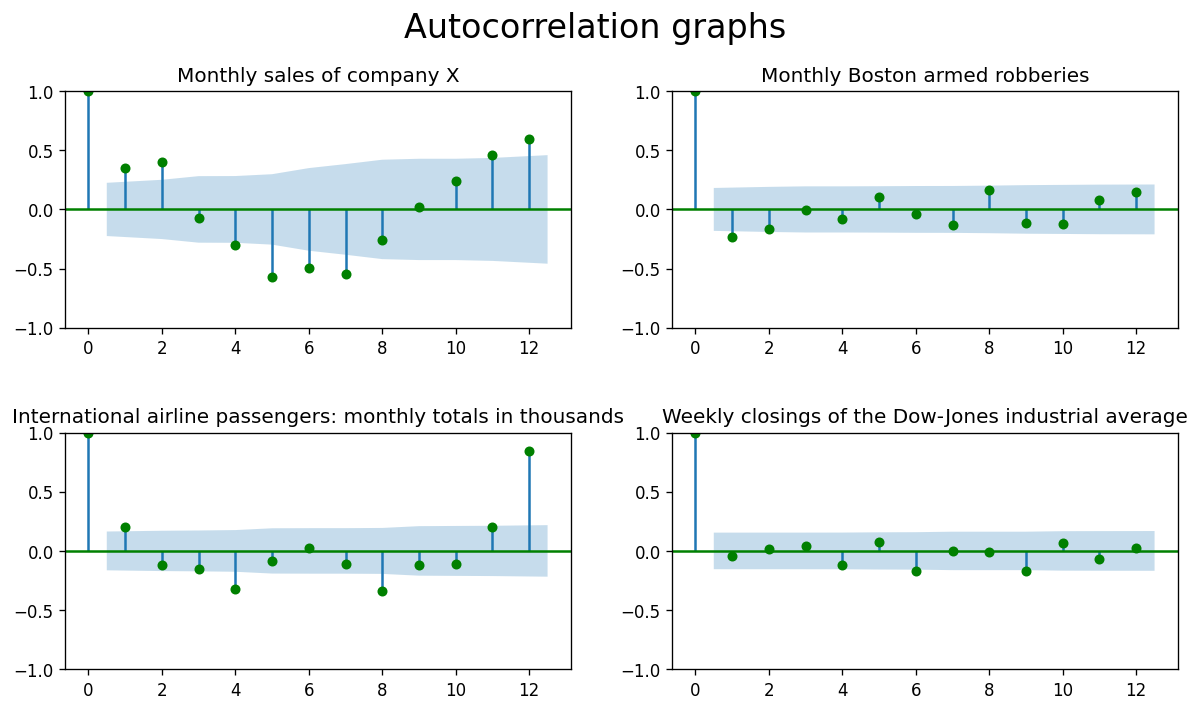

In [313]:
Autocorrelation_graphs(trend_series)

In [314]:
for key, value in trend_series.items():
  print("_______________\n")
  print(f'Временной ряд {key}')
  print()
  Dickey_Fuller(value)

_______________

Временной ряд Monthly sales of company X

ADF Statistic: -3.135644
p-value: 0.024025
Critical Values:
	1%: -3.537

	5%: -2.908

	10%: -2.591

Стационарный временной ряд
_______________

Временной ряд Monthly Boston armed robberies

ADF Statistic: -7.601792
p-value: 0.000000
Critical Values:
	1%: -3.490

	5%: -2.887

	10%: -2.581

Стационарный временной ряд
_______________

Временной ряд International airline passengers: monthly totals in thousands

ADF Statistic: -2.717131
p-value: 0.071121
Critical Values:
	1%: -3.483

	5%: -2.884

	10%: -2.579

Временной ряд не является стационарным
_______________

Временной ряд Weekly closings of the Dow-Jones industrial average

ADF Statistic: -12.995821
p-value: 0.000000
Critical Values:
	1%: -3.472

	5%: -2.880

	10%: -2.576

Стационарный временной ряд


Остался только один нестационарный ряд "International airline passengers: monthly totals in thousands"

**Уберем сезонность**

In [320]:
trend_series['International airline passengers: monthly totals in thousands'] = trend_series['International airline passengers: monthly totals in thousands'].diff(12).dropna()

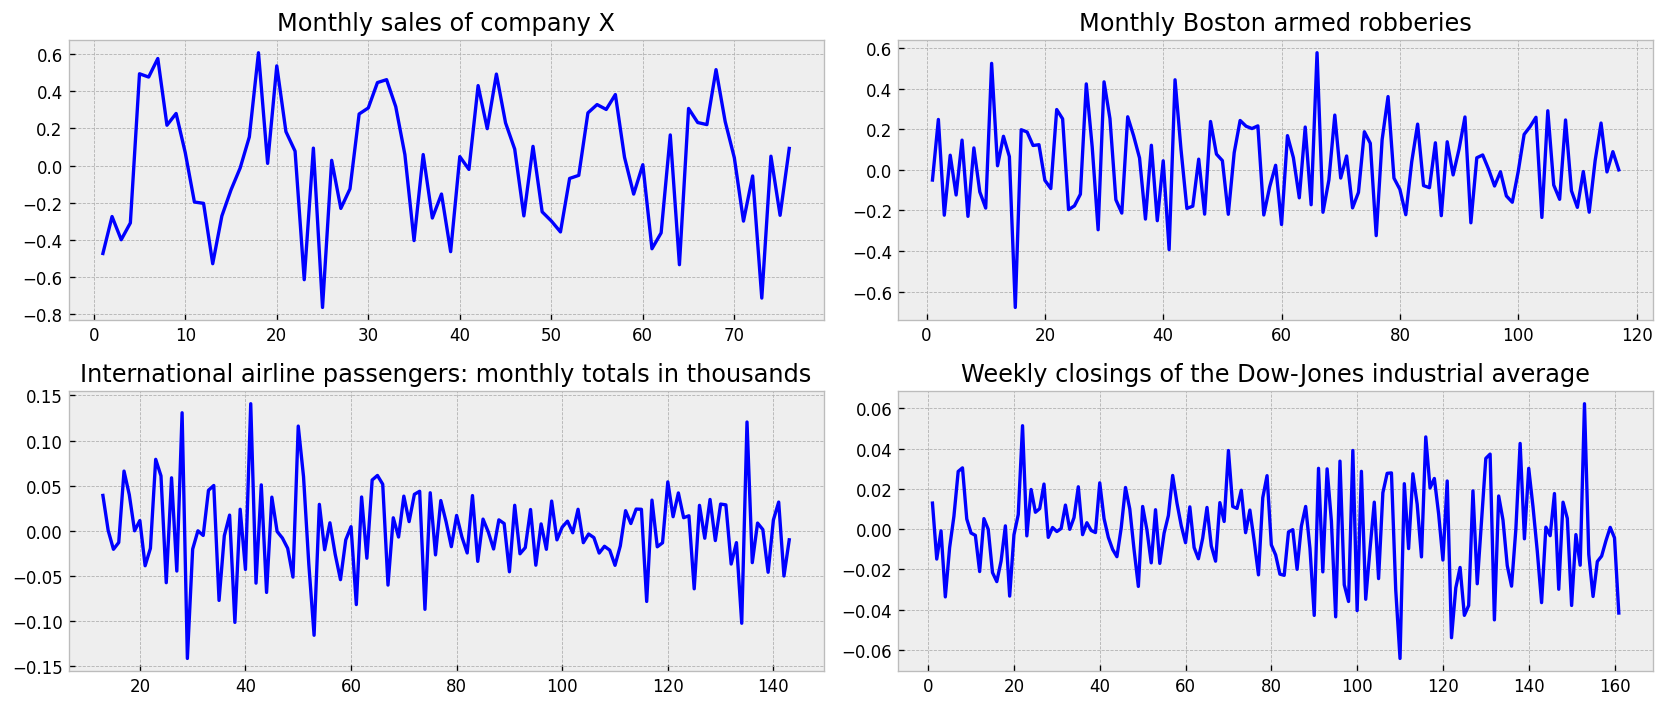

In [321]:
grafs(trend_series)

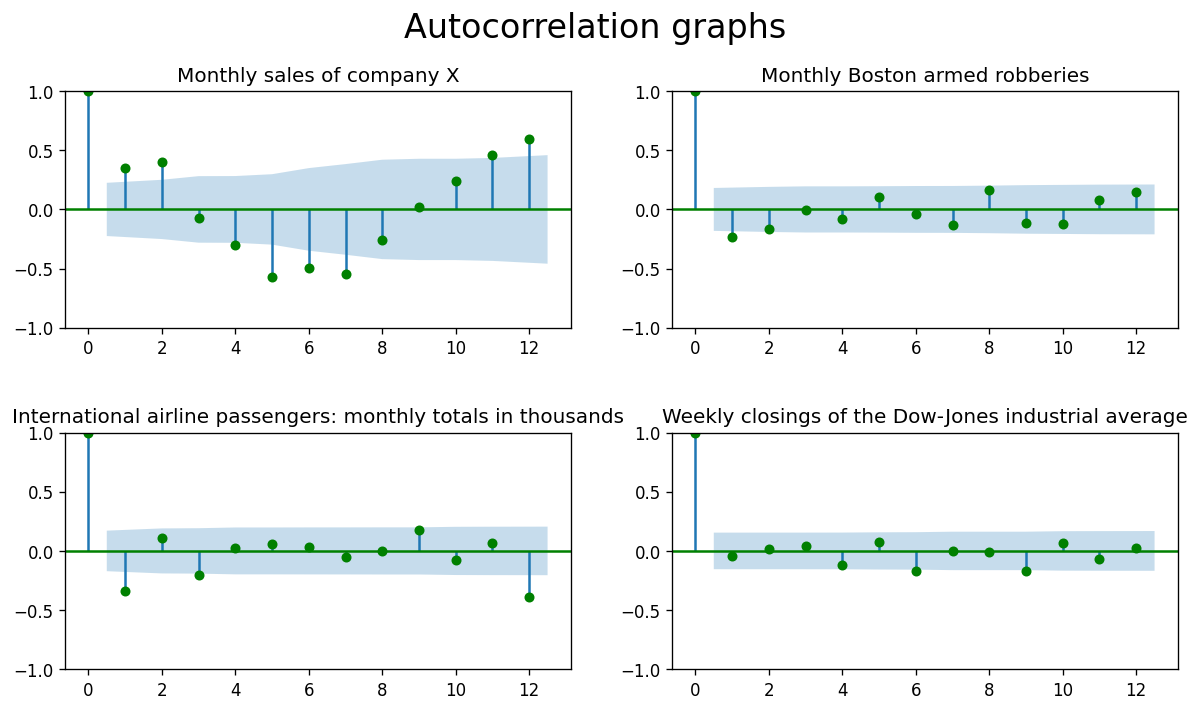

In [322]:
Autocorrelation_graphs(trend_series)

In [323]:
for key, value in trend_series.items():
  print("_______________\n")
  print(f'Временной ряд {key}')
  print()
  Dickey_Fuller(value)

_______________

Временной ряд Monthly sales of company X

ADF Statistic: -3.135644
p-value: 0.024025
Critical Values:
	1%: -3.537

	5%: -2.908

	10%: -2.591

Стационарный временной ряд
_______________

Временной ряд Monthly Boston armed robberies

ADF Statistic: -7.601792
p-value: 0.000000
Critical Values:
	1%: -3.490

	5%: -2.887

	10%: -2.581

Стационарный временной ряд
_______________

Временной ряд International airline passengers: monthly totals in thousands

ADF Statistic: -4.443325
p-value: 0.000249
Critical Values:
	1%: -3.487

	5%: -2.886

	10%: -2.580

Стационарный временной ряд
_______________

Временной ряд Weekly closings of the Dow-Jones industrial average

ADF Statistic: -12.995821
p-value: 0.000000
Critical Values:
	1%: -3.472

	5%: -2.880

	10%: -2.576

Стационарный временной ряд
